In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

#### Selic

In [20]:
selic = pd.read_csv('./selic.csv', sep=';')
selic['date'] = pd.to_datetime(selic['date'])
selic['value'] = selic['value'] * 100 * 252
selic.set_index('date', inplace=True)
selic = selic.sort_index(ascending=True)

In [21]:
selic.tail()

,value
date,
2022-07-07,12.357324
2022-07-08,12.357324
2022-07-11,12.357324
2022-07-12,12.357324
2022-07-13,12.357324


In [22]:
selic.value.values[-1]

12.357323999999998

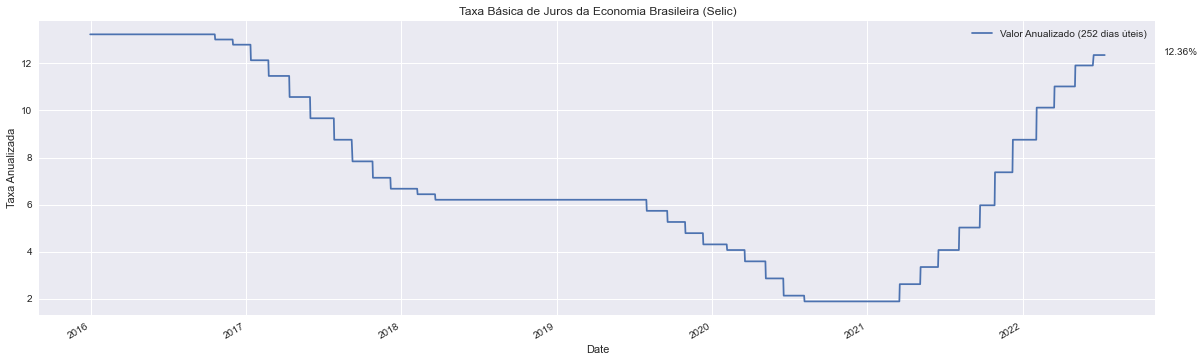

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
selic.plot(ax=ax)
ax.set_title('Taxa Básica de Juros da Economia Brasileira (Selic)')
plt.legend(['Valor Anualizado (252 dias úteis)'])
plt.ylabel('Taxa Anualizada')
plt.xlabel('Date')
plt.annotate('%0.2f' % selic.value.values[-1] + '%', xy=(1, selic.value.values[-1]), xytext=(8, 0), 
                xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.plot();

In [24]:
dt_index = pd.date_range(start='1/1/2018', end='1/6/2022', freq='D')
df_index = pd.DataFrame()
df_index['date'] = dt_index
df_index['value_i'] = -1
df_index.set_index(['date'], inplace=True)
df_index.sort_index(ascending=True)
df_index

,value_i
date,
2018-01-01,-1
2018-01-02,-1
2018-01-03,-1
2018-01-04,-1
2018-01-05,-1
...,...
2022-01-02,-1
2022-01-03,-1
2022-01-04,-1


#### IPCA

Essa tabela mostra o IPCA acumulado dos últimos 12 meses para cada mês dos últimos 24 meses. O campo “Valor” está em porcentagem.


In [25]:
# Import IPCA csv
ipca = pd.read_csv('./ipca.csv', sep=';')
ipca = ipca.shift(-1).dropna()
ipca

,date,value
0,01/02/2018,2.84
1,01/03/2018,2.68
2,01/04/2018,2.76
3,01/05/2018,2.86
4,01/06/2018,4.39
5,01/07/2018,4.48
6,01/08/2018,4.19
7,01/09/2018,4.53
8,01/10/2018,4.56
9,01/11/2018,4.05


In [26]:
# Make it daily
ipca['date'] = pd.to_datetime(ipca['date'], format='%d/%m/%Y')

ipca_daily = ipca.set_index('date').resample('d').ffill().reset_index()
ipca_daily.set_index('date', inplace=True)

In [27]:
ipca_daily.to_csv('./ipca_daily.csv', sep=';')
ipca_daily.tail()

,value
date,
2022-06-27,11.89
2022-06-28,11.89
2022-06-29,11.89
2022-06-30,11.89
2022-07-01,11.89


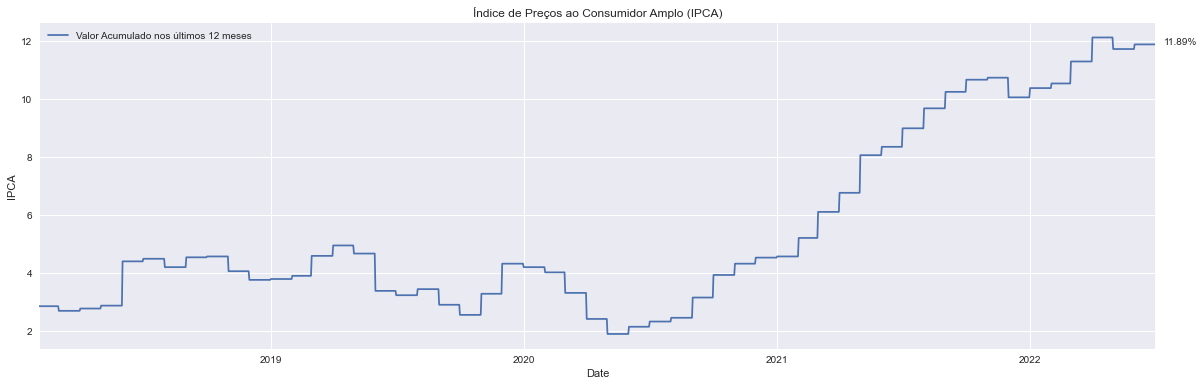

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))
ipca_daily.plot(ax=ax)
ax.set_title('Índice de Preços ao Consumidor Amplo (IPCA)')
plt.legend(['Valor Acumulado nos últimos 12 meses'])
plt.ylabel('IPCA')
plt.xlabel('Date')
plt.annotate('%0.2f' % ipca_daily.value.values[-1] + '%', 
                xy=(1, ipca_daily.value.values[-1]),
                xytext=(8, 0),
                xycoords=('axes fraction', 'data'),
                textcoords='offset points')

plt.plot();

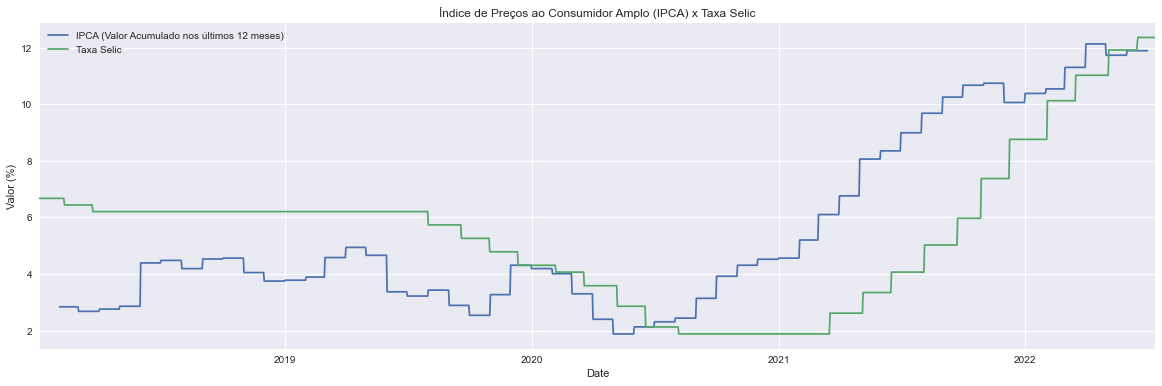

In [29]:
fig, ax = plt.subplots(figsize=(20, 6), sharex=True)
ipca_daily.loc['2018':].plot(ax=ax)
selic.loc['2018':].plot(ax=ax)
ax.set_title('Índice de Preços ao Consumidor Amplo (IPCA) x Taxa Selic')
plt.legend(['IPCA (Valor Acumulado nos últimos 12 meses)', 'Taxa Selic'])
plt.ylabel('Valor (%)')
plt.xlabel('Date')

plt.plot();